In [390]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [391]:
df = pd.read_csv("C:/dataset/DSA_features.csv")

In [392]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [393]:
df["activity"].unique()

array(['sitting', 'standing', 'lyingBack', 'lyingRigh', 'ascendingStairs',
       'decendingStairs', 'standingInElevatorStill', 'movingInElevator',
       'walkingLot', 'walkingTreadmillFlat', 'walkingTreadmillIncline',
       'runningTreadmill', 'stepper', 'crossTrainer', 'cyclingHorizontal',
       'cyclingVertical', 'rowing', 'jumping', 'basketBall'], dtype=object)

In [394]:
df_data = df[(df["activity"] == "lyingBack") | (df["activity"] == "lyingRigh")|(df["activity"] == "standing")]

In [395]:
df_data.shape

(1440, 272)

In [396]:
df_data["activity"].value_counts()

activity
standing     480
lyingBack    480
lyingRigh    480
Name: count, dtype: int64

In [397]:
df_data.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
480,8.416815,8.5783,8.3103,0.002356,0.048537,0.867785,0.571528,0.73677,0.35819,0.004036,...,0.001131,0.243260,0.644246,0.64700,0.64109,0.000002,0.001313,-0.184083,standing,p1
481,8.439497,8.6153,8.1908,0.005754,0.075855,0.092156,0.499881,0.63267,0.32807,0.004515,...,0.001678,0.391596,0.643432,0.64789,0.63942,0.000003,0.001805,0.239917,standing,p1
482,8.442786,8.5184,8.3690,0.000786,0.028033,0.096127,0.429967,0.59482,0.32835,0.001260,...,0.001327,0.753549,0.643036,0.64646,0.64019,0.000002,0.001447,0.178525,standing,p1
483,8.444243,8.5480,8.3692,0.001558,0.039470,0.361301,0.414673,0.49073,0.33563,0.000867,...,0.003490,0.178568,0.643370,0.64657,0.64004,0.000003,0.001771,0.080492,standing,p1
484,8.347373,8.4138,8.2791,0.000774,0.027822,0.018596,0.441606,0.52153,0.37246,0.001067,...,0.000940,-0.237978,0.643874,0.64611,0.64063,0.000001,0.001219,-0.291443,standing,p1


In [398]:
df_data.tail()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.4207,0.000242,...,0.009589,0.401254,-0.410987,-0.38221,-0.44605,0.000099,0.009967,-0.597598,lyingRigh,p8
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.4356,0.000156,...,0.008588,0.147180,-0.411248,-0.36581,-0.43676,0.000087,0.009306,1.021454,lyingRigh,p8
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.4313,0.000214,...,0.005814,0.032341,-0.409787,-0.37926,-0.43431,0.000073,0.008520,0.431012,lyingRigh,p8
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.4539,0.000257,...,0.009510,0.409508,-0.409101,-0.36074,-0.44087,0.000113,0.010620,1.368666,lyingRigh,p8
1919,2.615565,2.6789,2.5734,0.000310,0.017610,0.608394,-9.398614,-9.3661,-9.4279,0.000167,...,0.009874,0.413339,-0.410440,-0.38588,-0.43841,0.000072,0.008495,0.054973,lyingRigh,p8


In [399]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_data['activity'] = label_encoder.fit_transform(df_data['activity'])

C:\TempFolder\ipykernel_6560\2711231745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['activity'] = label_encoder.fit_transform(df_data['activity'])


In [400]:
print(df_data["activity"].value_counts())
df_data = df_data.drop(["people"], axis=1)

activity
2    480
0    480
1    480
Name: count, dtype: int64


In [401]:
df_data.head()
#activity 2은 standing activity == 0 1은 lyingback lyinghigh

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
480,8.416815,8.5783,8.3103,0.002356,0.048537,0.867785,0.571528,0.73677,0.35819,0.004036,...,1.278649e-06,0.001131,0.243260,0.644246,0.64700,0.64109,0.000002,0.001313,-0.184083,2
481,8.439497,8.6153,8.1908,0.005754,0.075855,0.092156,0.499881,0.63267,0.32807,0.004515,...,2.816324e-06,0.001678,0.391596,0.643432,0.64789,0.63942,0.000003,0.001805,0.239917,2
482,8.442786,8.5184,8.3690,0.000786,0.028033,0.096127,0.429967,0.59482,0.32835,0.001260,...,1.760422e-06,0.001327,0.753549,0.643036,0.64646,0.64019,0.000002,0.001447,0.178525,2
483,8.444243,8.5480,8.3692,0.001558,0.039470,0.361301,0.414673,0.49073,0.33563,0.000867,...,1.218089e-05,0.003490,0.178568,0.643370,0.64657,0.64004,0.000003,0.001771,0.080492,2
484,8.347373,8.4138,8.2791,0.000774,0.027822,0.018596,0.441606,0.52153,0.37246,0.001067,...,8.834185e-07,0.000940,-0.237978,0.643874,0.64611,0.64063,0.000001,0.001219,-0.291443,2


In [402]:
df_data.tail()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.4207,0.000242,...,0.000092,0.009589,0.401254,-0.410987,-0.38221,-0.44605,0.000099,0.009967,-0.597598,1
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.4356,0.000156,...,0.000074,0.008588,0.147180,-0.411248,-0.36581,-0.43676,0.000087,0.009306,1.021454,1
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.4313,0.000214,...,0.000034,0.005814,0.032341,-0.409787,-0.37926,-0.43431,0.000073,0.008520,0.431012,1
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.4539,0.000257,...,0.000090,0.009510,0.409508,-0.409101,-0.36074,-0.44087,0.000113,0.010620,1.368666,1
1919,2.615565,2.6789,2.5734,0.000310,0.017610,0.608394,-9.398614,-9.3661,-9.4279,0.000167,...,0.000097,0.009874,0.413339,-0.410440,-0.38588,-0.43841,0.000072,0.008495,0.054973,1


In [403]:
df_data['activity'] = df_data['activity'].apply(lambda x: 0 if x in [0, 1] else 1)

In [404]:
df_data.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
480,8.416815,8.5783,8.3103,0.002356,0.048537,0.867785,0.571528,0.73677,0.35819,0.004036,...,1.278649e-06,0.001131,0.243260,0.644246,0.64700,0.64109,0.000002,0.001313,-0.184083,1
481,8.439497,8.6153,8.1908,0.005754,0.075855,0.092156,0.499881,0.63267,0.32807,0.004515,...,2.816324e-06,0.001678,0.391596,0.643432,0.64789,0.63942,0.000003,0.001805,0.239917,1
482,8.442786,8.5184,8.3690,0.000786,0.028033,0.096127,0.429967,0.59482,0.32835,0.001260,...,1.760422e-06,0.001327,0.753549,0.643036,0.64646,0.64019,0.000002,0.001447,0.178525,1
483,8.444243,8.5480,8.3692,0.001558,0.039470,0.361301,0.414673,0.49073,0.33563,0.000867,...,1.218089e-05,0.003490,0.178568,0.643370,0.64657,0.64004,0.000003,0.001771,0.080492,1
484,8.347373,8.4138,8.2791,0.000774,0.027822,0.018596,0.441606,0.52153,0.37246,0.001067,...,8.834185e-07,0.000940,-0.237978,0.643874,0.64611,0.64063,0.000001,0.001219,-0.291443,1


In [405]:
df_data.tail()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.4207,0.000242,...,0.000092,0.009589,0.401254,-0.410987,-0.38221,-0.44605,0.000099,0.009967,-0.597598,0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.4356,0.000156,...,0.000074,0.008588,0.147180,-0.411248,-0.36581,-0.43676,0.000087,0.009306,1.021454,0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.4313,0.000214,...,0.000034,0.005814,0.032341,-0.409787,-0.37926,-0.43431,0.000073,0.008520,0.431012,0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.4539,0.000257,...,0.000090,0.009510,0.409508,-0.409101,-0.36074,-0.44087,0.000113,0.010620,1.368666,0
1919,2.615565,2.6789,2.5734,0.000310,0.017610,0.608394,-9.398614,-9.3661,-9.4279,0.000167,...,0.000097,0.009874,0.413339,-0.410440,-0.38588,-0.43841,0.000072,0.008495,0.054973,0


In [406]:
df_data["activity"].value_counts()

activity
0    960
1    480
Name: count, dtype: int64

In [407]:

X_train, X_test = train_test_split(df_data, test_size=0.2, random_state=42)

X_train = X_train[X_train.activity == 0]
X_train = X_train.drop(['activity'], axis=1)

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)


X_train.shape

(763, 270)

linear AE

In [409]:
input_dim = X_train.shape[1]  # 입력 차원 (특성 수)
encoding_dim = 32

# 입력 레이어
input_layer = Input(shape=(input_dim,))

# 인코더: 점진적으로 차원 축소
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim), activation='relu')(encoded)

# 디코더: 점진적으로 차원 확장
decoded = Dense(int(encoding_dim), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 입력 차원으로 복원

# 오토인코더 모델 구성
autoencoder = Model(inputs=input_layer, outputs=decoded)

# 모델 컴파일
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델 요약 출력
autoencoder.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 32)                  │           8,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 270)                 │           4,590 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,862 (58.05 KB)

 Trainable params: 14,862 (58.05 KB)

 Non-trainable params: 0 (0.00 B)

In [410]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,  # 에포크 수
    batch_size=256,
    shuffle=True,
    validation_split = 0.1)  # 검증 데이터


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 5.8165 - val_loss: 5.7561
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.7406 - val_loss: 5.7444
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.7679 - val_loss: 5.7301
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.6909 - val_loss: 5.7102
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.7250 - val_loss: 5.6821
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.7087 - val_loss: 5.6437
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.6399 - val_loss: 5.5936
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.6343 - val_loss: 5.5329
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.5308 - val_loss: 5.4635
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.4923 - val_loss: 5.3874
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.4260 - val_loss: 5.3079
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.2874 - val_loss: 5.2314
E

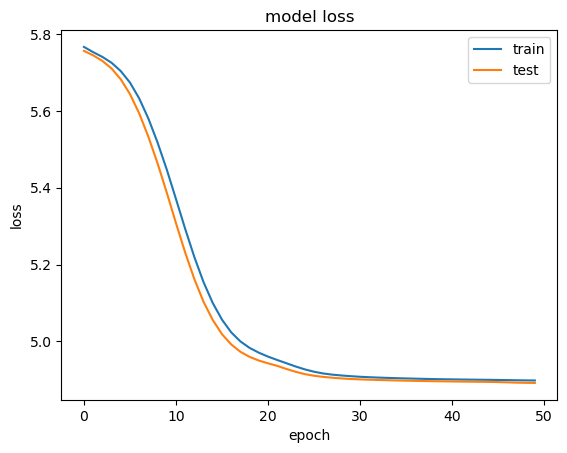

In [411]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [412]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,reconstruction_error,true_class
count,288.000000,288.000000
mean,4.923210,0.315972
std,0.261053,0.465711
min,4.512723,0.000000
25%,4.655432,0.000000
50%,4.942996,0.000000
75%,5.140901,1.000000
max,5.689527,1.000000


In [413]:
threshold = 5.05

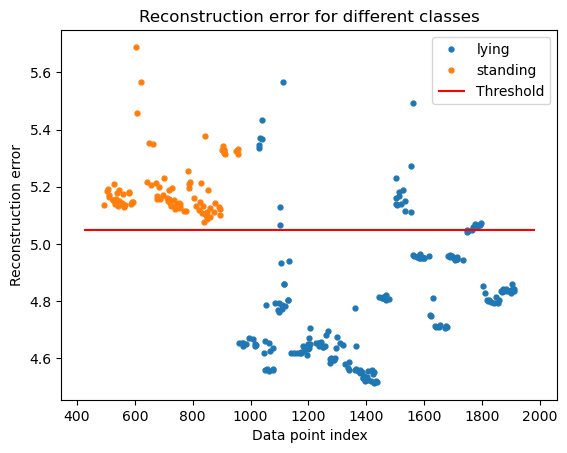

In [414]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "lying" if name == 0 else "standing")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [415]:
LABELS = ["lying","standing"]

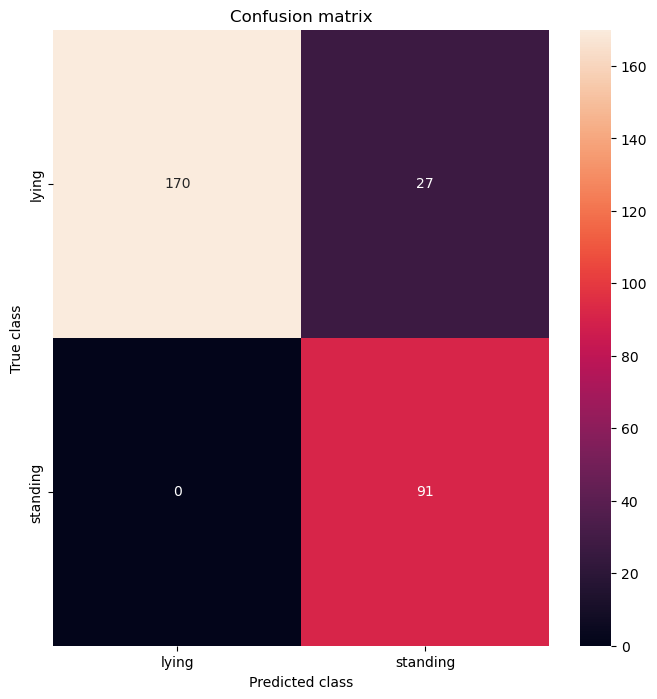

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       197
           1       0.77      1.00      0.87        91

    accuracy                           0.91       288
   macro avg       0.89      0.93      0.90       288
weighted avg       0.93      0.91      0.91       288



In [416]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [417]:
acc: 93

In [418]:
input_dim = X_train.shape[1]  # 입력 차원 (특성 수)
encoding_dim = 32

# 입력 레이어
input_layer = Input(shape=(input_dim,))

# 인코더: 점진적으로 차원 축소
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim * 3), activation='relu')(encoded)
encoded = Dense(int(encoding_dim * 2), activation='relu')(encoded)

# 디코더: 점진적으로 차원 확장
decoded = Dense(int(encoding_dim * 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim * 4), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 입력 차원으로 복원

# 오토인코더 모델 구성
nonlin_autoencoder = Model(inputs=input_layer, outputs=decoded)

# 모델 컴파일
nonlin_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델 요약 출력
nonlin_autoencoder.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 32)                  │           8,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 96)                  │           3,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 270)                 │          34,830 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,198 (239.05 KB)

 Trainable params: 61,198 (239.05 KB)

 Non-trainable params: 0 (0.00 B)

In [419]:
nonlin_history = nonlin_autoencoder.fit(
    X_train, X_train,
    epochs=50,  # 에포크 수
    batch_size=256,
    shuffle=True,
    validation_split = 0.1)  # 검증 데이터


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 5.7690 - val_loss: 5.6317
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.5837 - val_loss: 5.4876
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.4321 - val_loss: 5.3262
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.2807 - val_loss: 5.1873
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.2142 - val_loss: 5.0972
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.0869 - val_loss: 5.0451
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.0578 - val_loss: 5.0120
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.0191 - val_loss: 4.9879
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.9858 - val_loss: 4.9772
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.9839 - val_loss: 4.9679
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9977 - val_loss: 4.9553
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.9250 - val_loss: 4.9504
E

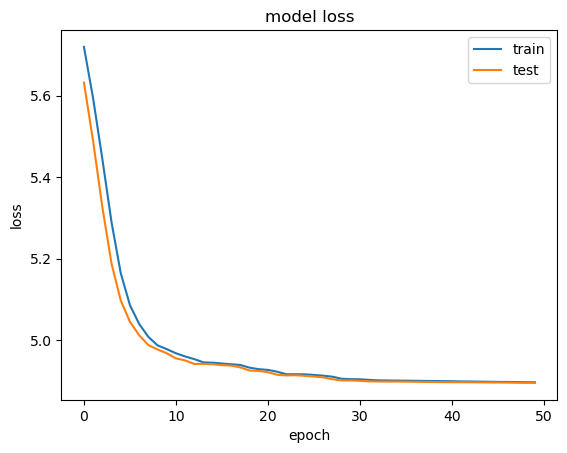

In [420]:
plt.plot(nonlin_history.history['loss'])
plt.plot(nonlin_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [421]:
nonlin_predictions = nonlin_autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - nonlin_predictions, 2), axis=1)
nonlin_error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
nonlin_error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,reconstruction_error,true_class
count,288.000000,288.000000
mean,4.929759,0.315972
std,0.266572,0.465711
min,4.509373,0.000000
25%,4.649653,0.000000
50%,4.939753,0.000000
75%,5.156209,1.000000
max,5.759642,1.000000


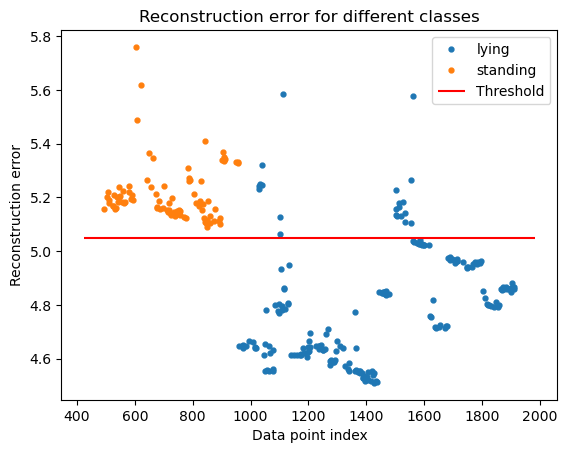

In [422]:
groups = nonlin_error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "lying" if name == 0 else "standing")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

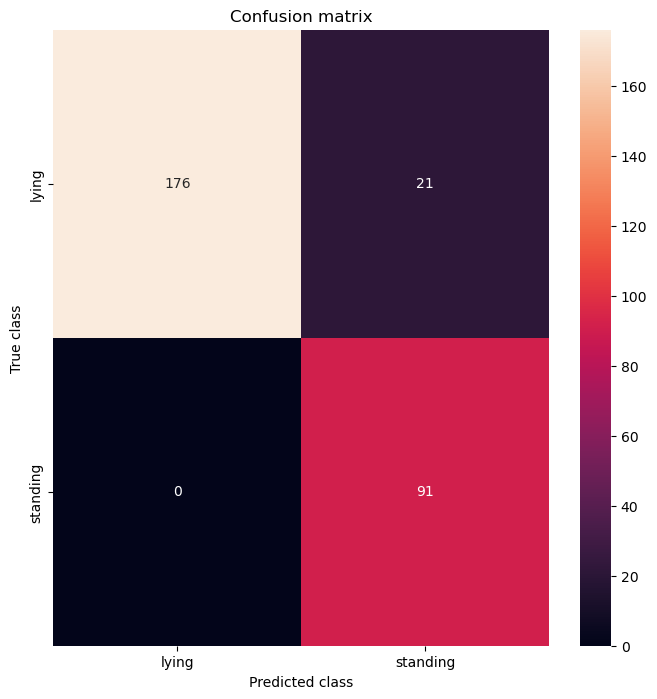

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       197
           1       0.81      1.00      0.90        91

    accuracy                           0.93       288
   macro avg       0.91      0.95      0.92       288
weighted avg       0.94      0.93      0.93       288



In [516]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in nonlin_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(nonlin_error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(nonlin_error_df.true_class, y_pred))

In [424]:
acc: 93

In [460]:
X_train.shape


(763, 270)

In [474]:
noise_factor = 0.2

X_train2 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=original_data.shape)

input_dim = X_train.shape[1]

encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim), activation='relu')(encoded)

# 디코더: 점진적으로 차원 확장
decoded = Dense(int(encoding_dim), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 입력 차원으로 복원

# 오토인코더 모델 구성
autoencoder = Model(inputs=input_layer, outputs=decoded)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 32)                  │           8,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 270)                 │           4,590 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,862 (58.05 KB)

 Trainable params: 14,862 (58.05 KB)

 Non-trainable params: 0 (0.00 B)

In [476]:
X_train2.shape

(763, 270)

In [478]:
X_train.shape

(763, 270)

In [480]:
autoencoder.fit(X_train, X_train2, epochs=100, batch_size=16, shuffle=True, verbose=0)

In [498]:
X_test2 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=original_data.shape)

In [500]:
denoised_data = autoencoder.predict(X_test2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [502]:
X_test2.shape

(288, 270)

In [504]:
denoised_data.shape

(288, 270)

In [508]:
from sklearn.metrics import mean_squared_error

mse = np.mean(np.power(X_test2 - denoised_data, 2), axis=1)
denoised_error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
denoised_error_df.describe()

,reconstruction_error,true_class
count,288.000000,288.000000
mean,4.953443,0.315972
std,0.260065,0.465711
min,4.539942,0.000000
25%,4.692407,0.000000
50%,4.963655,0.000000
75%,5.173810,1.000000
max,5.678709,1.000000


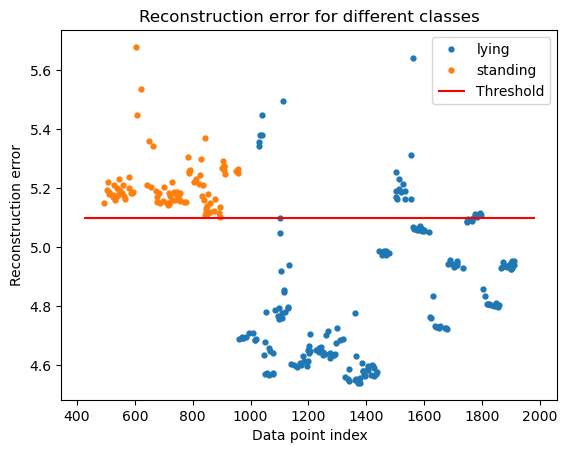

In [524]:
groups = denoised_error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "lying" if name == 0 else "standing")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [520]:
threshold = 5.1

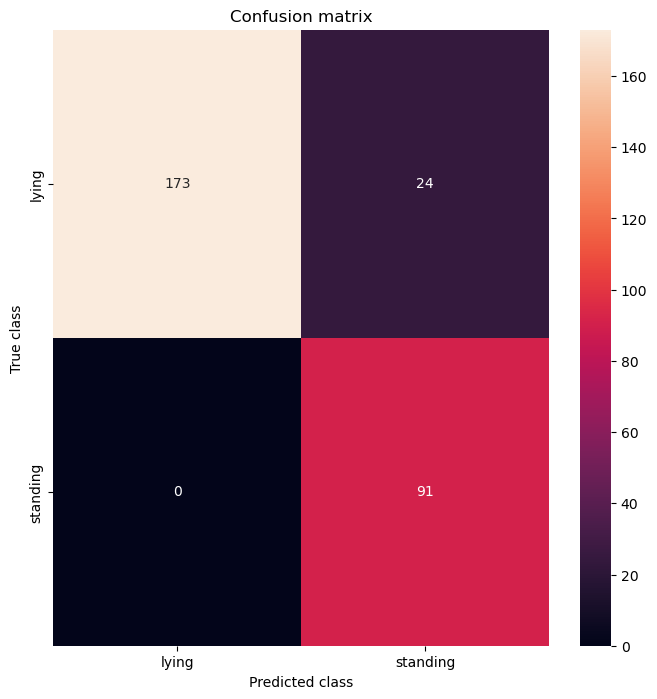

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       197
           1       0.79      1.00      0.88        91

    accuracy                           0.92       288
   macro avg       0.90      0.94      0.91       288
weighted avg       0.93      0.92      0.92       288



In [522]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in denoised_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(denoised_error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(denoised_error_df.true_class, y_pred))